In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles, make_moons

import scipy

import torch
import torch.nn as nn
import math

In [49]:
def prob_normal(x:torch.Tensor):
    assert x.ndim > 1
    return torch.exp(-0.5*(x**2).sum(dim=1, keepdim=True))/((2*np.pi)**(x.shape[1]/2))

def prob_gaussian_1d(x, mean, std):
    return 1/std/np.sqrt(2*np.pi)*torch.exp(-0.5*((x-mean)/std)**2)

In [50]:
class prob_NN(nn.Module):
    
    def __init__(self, net):
        super().__init__()
        '''
        net must be ND -> ND function ??
        '''
        self.net = net
        
    def forward(self,x):
        x = self.net(x)
        return prob_normal(x)

In [51]:
inp = torch.randn(200,1)*3-1
# inp = torch.rand(200)*5-1
# targ = torch.ones_like(inp)/len(inp) 

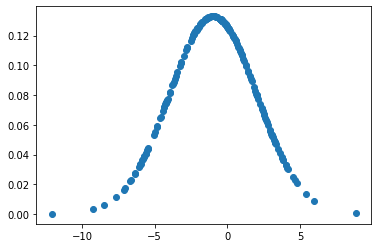

In [52]:
%matplotlib inline

targ_prob = prob_gaussian_1d(inp, -1, 3)
plt.scatter(inp, targ_prob)

In [53]:
net = nn.Sequential(
    nn.Linear(1,1)
)

probNet = prob_NN(net)
optimizer = torch.optim.Adam(probNet.parameters(), lr=0.001)

# criterion = nn.NLLLoss()
def criterion(probs):
    return -torch.log(probs).sum()

In [54]:
%matplotlib tk
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

for step in range(1000):
    prob = probNet(inp)
    loss = criterion(prob)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if step%10 == 0:
        print(f'Step:{step}, NLL:{float(loss)}')
        
        ax.clear()
        ax.scatter(inp, targ_prob, marker='.', color='g')
        ax.scatter(inp, prob.data.numpy().reshape(-1), color='r', lw=3, label='yout')
#         ax.legend()
#         print("\n")
        plt.pause(0.01)

Step:0, NLL:219.44705200195312
Step:10, NLL:215.67572021484375
Step:20, NLL:212.14898681640625
Step:30, NLL:208.88851928710938
Step:40, NLL:205.90196228027344
Step:50, NLL:203.1861572265625
Step:60, NLL:200.73098754882812
Step:70, NLL:198.52276611328125
Step:80, NLL:196.54611206054688
Step:90, NLL:194.7850341796875
Step:100, NLL:193.2234344482422
Step:110, NLL:191.84539794921875
Step:120, NLL:190.6354217529297
Step:130, NLL:189.5784454345703
Step:140, NLL:188.65994262695312
Step:150, NLL:187.8660888671875
Step:160, NLL:187.1837615966797
Step:170, NLL:186.60060119628906
Step:180, NLL:186.10501098632812
Step:190, NLL:185.68638610839844
Step:200, NLL:185.33480834960938
Step:210, NLL:185.04132080078125
Step:220, NLL:184.79782104492188
Step:230, NLL:184.5970001220703
Step:240, NLL:184.4324188232422
Step:250, NLL:184.2983856201172
Step:260, NLL:184.18988037109375
Step:270, NLL:184.1026153564453
Step:280, NLL:184.03285217285156
Step:290, NLL:183.97743225097656
Step:300, NLL:183.93370056152344

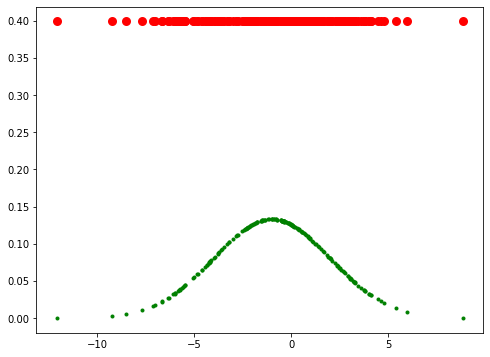

In [55]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.scatter(inp, targ_prob, marker='.', color='g')
ax.scatter(inp, prob.data.numpy().reshape(-1), color='r', lw=3, label='yout')